#                              ANN Project on Predicting Bad Debts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Exploratory Data Analysis

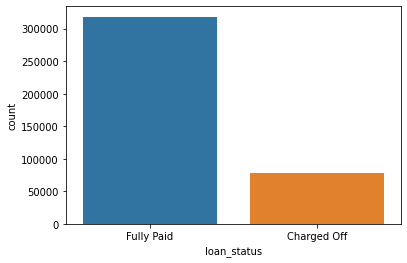

In [7]:
sns.countplot(x='loan_status',data=df)

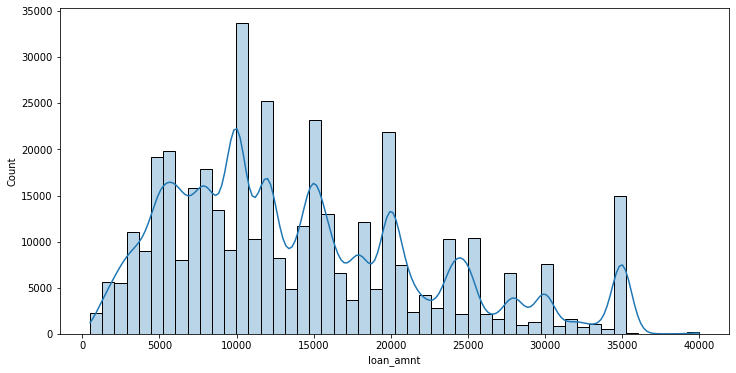

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(x='loan_amnt',data=df,bins=50,kde=True,alpha=0.3)

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


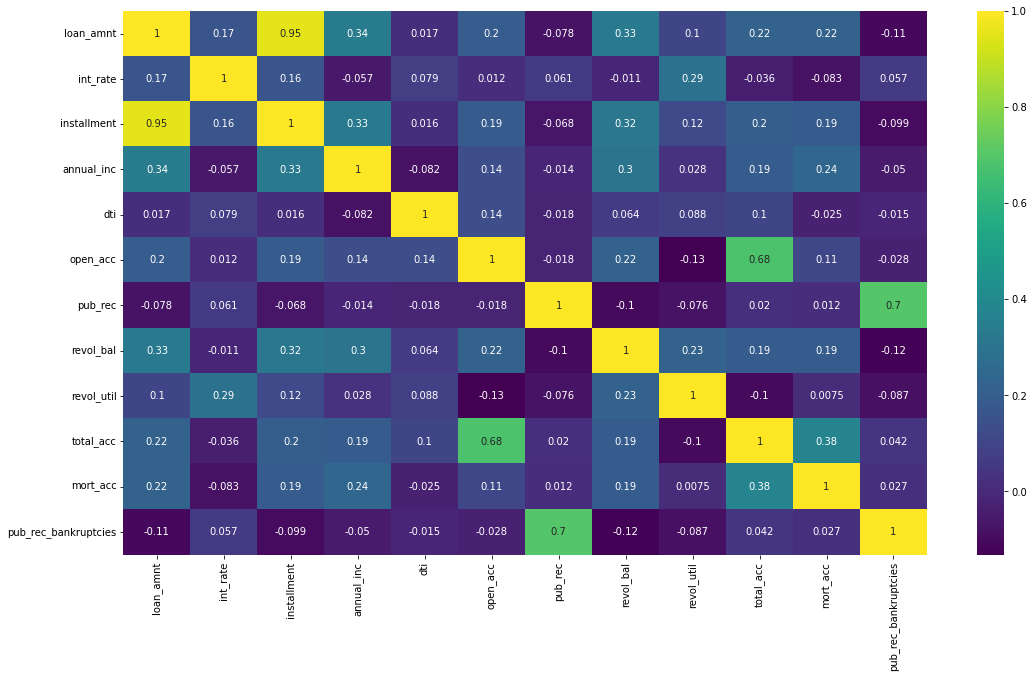

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

#### Loan amount and installment are highly correlated so further visualizing

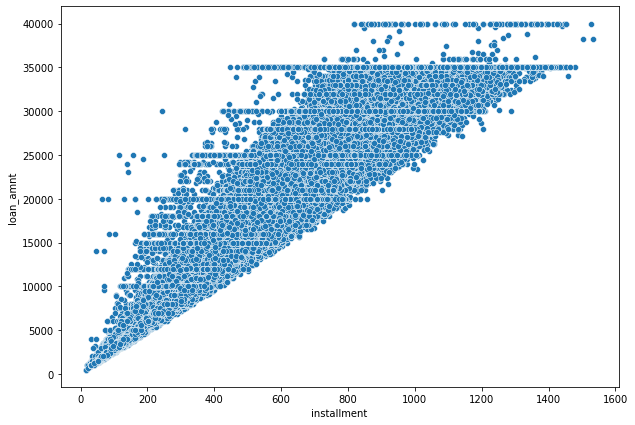

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='loan_amnt',x='installment',data=df)

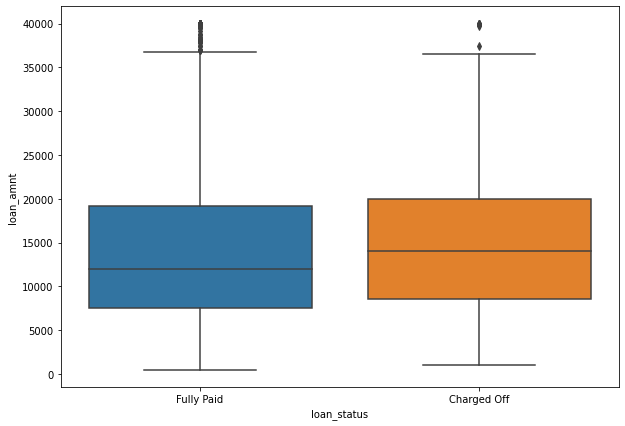

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(y='loan_amnt',data=df,x='loan_status')

#### Stats summary based on the loan status

In [13]:
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Visualizing grades and subgrades

In [15]:
print(df['grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [16]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


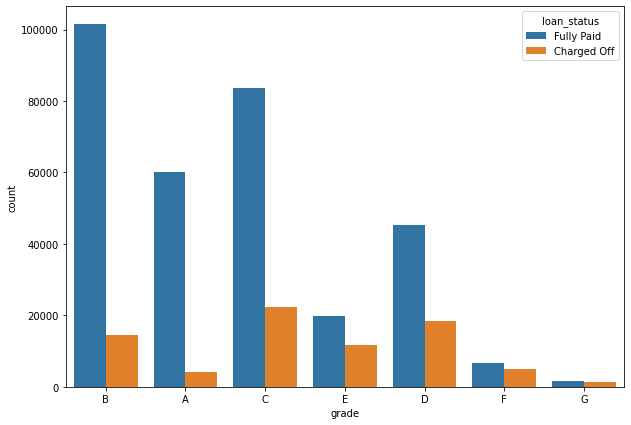

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x='grade',data=df,hue='loan_status')

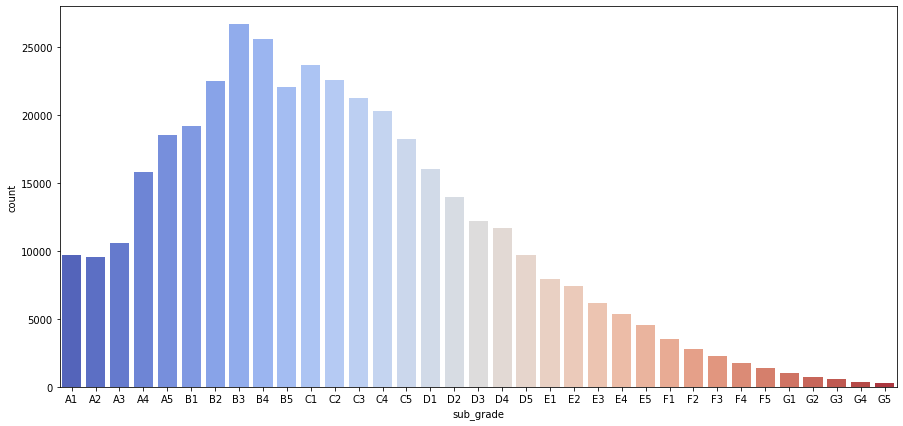

In [18]:
plt.figure(figsize=(15,7))
reorder = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=reorder,palette='coolwarm')

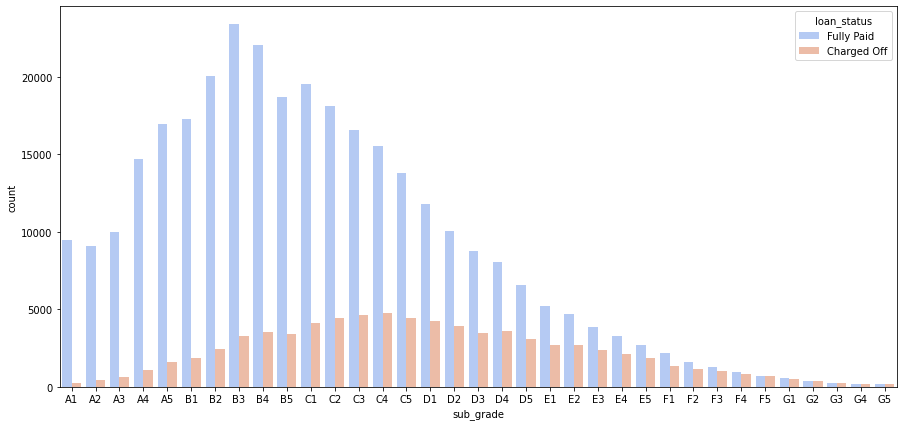

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='sub_grade',data=df,order=reorder,palette='coolwarm',hue='loan_status')

#### F & G not clear. Analyzing separately 

In [20]:
F_G = df[(df['grade']=='F') | (df['grade']=='G')]

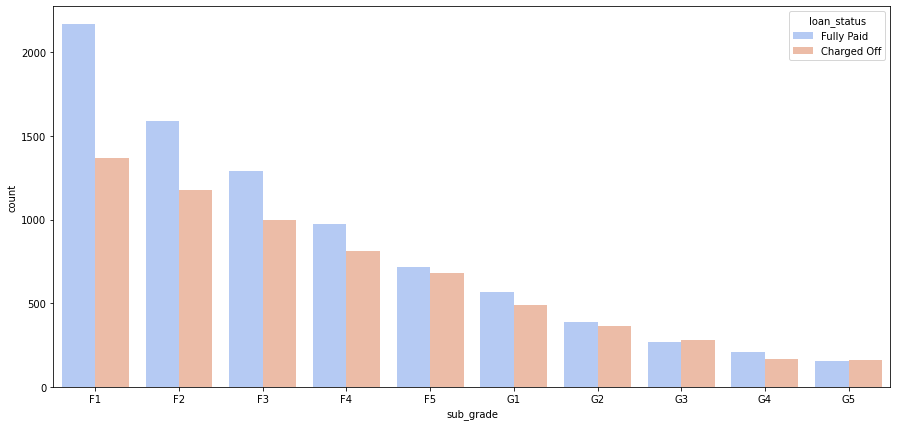

In [21]:
plt.figure(figsize=(15,7))
reorder = sorted(F_G['sub_grade'].unique())
sns.countplot(x='sub_grade',data=F_G,order=reorder,palette='coolwarm',hue='loan_status')

#### Creating the labels for training

In [22]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [23]:
labels = df['loan_repaid']

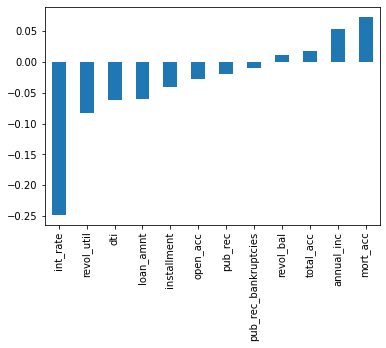

In [24]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Processing the data

In [25]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Checking how much of the data is missing

In [26]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### missing rows of title, revol_util & bankruptcies can be dropped as the missing data is < 0.5% and exploring further for the rest 3

In [27]:
df['emp_title'].nunique()

173105

In [28]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

#### nearly 2/3rd of the data has uniques titles. can't featurize 173105 data points, so droping the emp_title column makes more sense as there is little information in that column 

In [29]:
df = df.drop('emp_title',axis=1)

In [30]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
emp_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

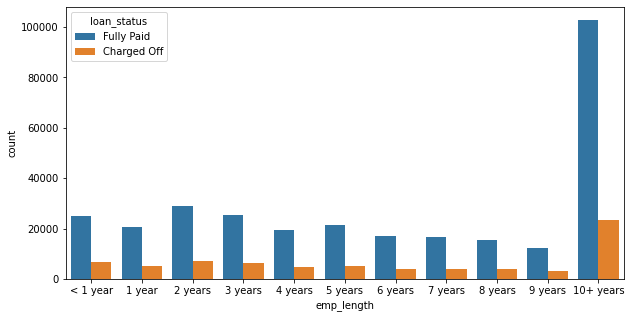

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df,order =emp_order,hue='loan_status')

#### ratio of charged off to fully paid

In [33]:
den = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [34]:
num = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [35]:
print(num/den)

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64


#### for every term length the ratio is quite similar, no great difference on whether a person working for more years pays off his loan or vice versa. so dropping the emp_length column will not affect that much

In [36]:
df = df.drop('emp_length',axis=1)

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
df = df.drop('title',axis=1)

In [39]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

#### Filling the missing values of mort_acc with help of other features that highly correlate with it

In [40]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### total_acc correlates well compared to others. so filling the mean of mort_acc by grouping the total_acc

In [41]:
ref_tot_mort_acc = df.groupby('total_acc').mean()['mort_acc']

In [42]:
ref_tot_mort_acc[2]

0.0

In [43]:
def fill_mort_acc(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return ref_tot_mort_acc[total_acc]
    else:
        return mort_acc

In [44]:
df['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [45]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [46]:
df = df.dropna()

In [47]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Dealing with string/categorical columns

In [48]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Term column

In [49]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

###### This feature is binary either 36 or 60. One hot encoding can be applied to convert it into either 36 or not. Or as it is numeric it can be simply mapped to 36/60

In [50]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [51]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

#### Grade & subgrade feature

##### Grade is further divided into subgrade adn it is essentially a part of subgrade feature so grade can be dropped.

In [52]:
df = df.drop('grade',axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [54]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [55]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### Verification status feature

In [56]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

#### application_type feature

In [57]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

#### initial_list_status feature

In [58]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

#### pupose feature

In [59]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

##### Potential candidates to extract dummy variables

In [60]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

#### home_ownership feature

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [62]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [63]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

#### Address feature

In [64]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

##### Feature engineering the address column by grabbing the zip code only

In [65]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [66]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [67]:
df = df.drop('address',axis=1)

In [68]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

#### issue_d feature

###### This represents the month the loan was funded. This would be a data leakage as we wouldn't know beforehand whether or not a loan would be isued when using our model, so in theory we wouldn't have an issue date. so dropping this feature is necessary.

In [69]:
df = df.drop('issue_d',axis=1)

#### earliest_cr_line feature

In [70]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [71]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [72]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Scaling the data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  int64  
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

In [74]:
df = df.drop('loan_status',axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop('loan_repaid',axis=1).values

In [77]:
y = df['loan_repaid'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train  =scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

## ANN Model 

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [84]:
X_train.shape

(316175, 78)

In [85]:
# 78 features so match the first neural layer to it.
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layers

#model.add(Dense(58,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(29,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# Output layer as binary classification so 1 neuron at the end
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [86]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.3005 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2656 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2620 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2613 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2608 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2621
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2620
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2595 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

## Model evaluation

In [87]:
model.history.history

{'loss': [0.3004651963710785,
  0.2655569612979889,
  0.26331451535224915,
  0.26198816299438477,
  0.26126930117607117,
  0.2608480453491211,
  0.26021093130111694,
  0.2599720358848572,
  0.25945374369621277,
  0.25945746898651123,
  0.2587035894393921,
  0.2585239112377167,
  0.25819671154022217,
  0.2581019103527069,
  0.2579655647277832,
  0.2575358748435974,
  0.25747427344322205,
  0.25719720125198364,
  0.2569037675857544,
  0.2568942606449127,
  0.2568824589252472,
  0.2564438283443451,
  0.2564789652824402,
  0.2563037574291229,
  0.2560606896877289],
 'val_loss': [0.2651461958885193,
  0.2630719840526581,
  0.2623198926448822,
  0.26238247752189636,
  0.26221179962158203,
  0.2618841826915741,
  0.26210302114486694,
  0.2620130777359009,
  0.2617091238498688,
  0.26159581542015076,
  0.2614828646183014,
  0.26133647561073303,
  0.2616606056690216,
  0.2615368068218231,
  0.2615324556827545,
  0.2614975869655609,
  0.2613013982772827,
  0.26137372851371765,
  0.26188737154006

In [88]:
losses = pd.DataFrame(model.history.history)

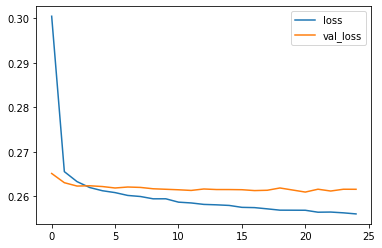

In [89]:
losses.plot()

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [92]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [93]:
print(confusion_matrix(y_test,predictions))


[[ 6929  8729]
 [  186 63200]]


## Biased data treatment

### SMOTE method

In [117]:
def deal_bias(X_train, X_test,y_train,y_test):

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  X_train  =scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  import tensorflow as tf
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense,Dropout

  # 78 features so match the first neural layer to it.
  model = Sequential()
  
  model.add(Dense(78,activation='relu'))
  model.add(Dropout(0.2))

  # hidden layers

  #model.add(Dense(58,activation='relu'))
  #model.add(Dropout(0.2))

  model.add(Dense(39,activation='relu'))
  model.add(Dropout(0.2))

  #model.add(Dense(29,activation='relu'))
  #model.add(Dropout(0.2))

  model.add(Dense(19,activation='relu'))
  model.add(Dropout(0.2))

  # Output layer as binary classification so 1 neuron at the end
  model.add(Dense(units=1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam')

  model.fit(x=X_train,y=y_train,epochs=30,batch_size=256,validation_data=(X_test,y_test))

  predictions = (model.predict(X_test) > 0.5).astype("int32")

  from sklearn.metrics import classification_report,confusion_matrix
  print(classification_report(y_test,y_pred))

  return predictions


In [101]:
df_class_1 = df[df['loan_repaid']==1]
df_class_0 = df[df['loan_repaid']==0]

In [102]:
print(df_class_1['loan_repaid'].value_counts())
print(df_class_0['loan_repaid'].value_counts())

1    317696
Name: loan_repaid, dtype: int64
0    77523
Name: loan_repaid, dtype: int64


In [103]:
X = df.drop('loan_repaid',axis=1)
y = df['loan_repaid']

In [106]:
y.value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [105]:
from imblearn.over_sampling import SMOTE

In [108]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)

In [109]:
y_sm.value_counts()

1    317696
0    317696
Name: loan_repaid, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=101,stratify=y_sm)

In [113]:
print(y_train.value_counts())
print(y_test.value_counts())

0    254157
1    254156
Name: loan_repaid, dtype: int64
1    63540
0    63539
Name: loan_repaid, dtype: int64


In [118]:
y_pred = deal_bias(X_train,X_test,y_train,y_test)

Epoch 1/30
1986/1986 [==============================] - 9s 4ms/step - loss: 0.2231 - val_loss: 0.1909
Epoch 2/30
1986/1986 [==============================] - 9s 4ms/step - loss: 0.1912 - val_loss: 0.1862
Epoch 3/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1876 - val_loss: 0.1843
Epoch 4/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1860 - val_loss: 0.1832
Epoch 5/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1851 - val_loss: 0.1826
Epoch 6/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1843 - val_loss: 0.1822
Epoch 7/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1836 - val_loss: 0.1826
Epoch 8/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1826 - val_loss: 0.1813
Epoch 9/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.1821 - val_loss: 0.1812
Epoch 10/30
1986/1986 [==============================] - 8s 4ms/step - loss: 0.181

## Ensemble method